In [ ]:
import tensorflow as tf
tf.__version__

'2.2.0'

##1. 랜덤으로 만든 시계열 데이터 연습(Many-to-one)

Sequence(시간 순서 - 문맥을 가진) 데이터라면(시계열 데이터등), 데이터 학습에 시간(문맥)을 포함하여 학습시키는 것이 당연합니다. 시계열 데이터, 이미지 시퀀스, 자연어의 단어 시퀀스, 문장 시퀀스 (episodic)등은 모두 시간에 따라 변하면서, 과거와 현재가 서로 연관성을 가진 데이터입니다.

RNN(Recurrent Neural Networks)은 이러한 데이터들을 위해 만들어진 모델입니다.
그러므로 RNN은 일반적으로 시계열 데이터를 분석하기에 적합한 인공신경망입니다.  

RNN은 시간 순서에 따른 데이터에서 과거와 현재의 자기종속구조를 학습하여 이후 시퀀스를 예측하는데 매우 유용한 도구입니다.

 



###1-1 단층 Simple RNN으로 데이터 실습

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

RNN은 입력 sequence의 길이와 출력 sequence의 길이에 따라, Many-to-one, Many-to-Many, one-to-Many 등이 있습니다.  
  
학습하는 방식은 크게 다르지 않습니다.  
먼저, Many-to-one 예제 데이터를 직접 생성하여 실습을 진행해보겠습니다.  

np.sin함수와 np.arange함수, np.random.random함수를 사용해 랜덤한 파형 그래프를 그리는 데이터를 생성하겠습니다.   

In [ ]:
data = np.sin(2*np.pi*np.arange(0, 1000))*10 + np.random.random(1000)
data.shape

(1000,)

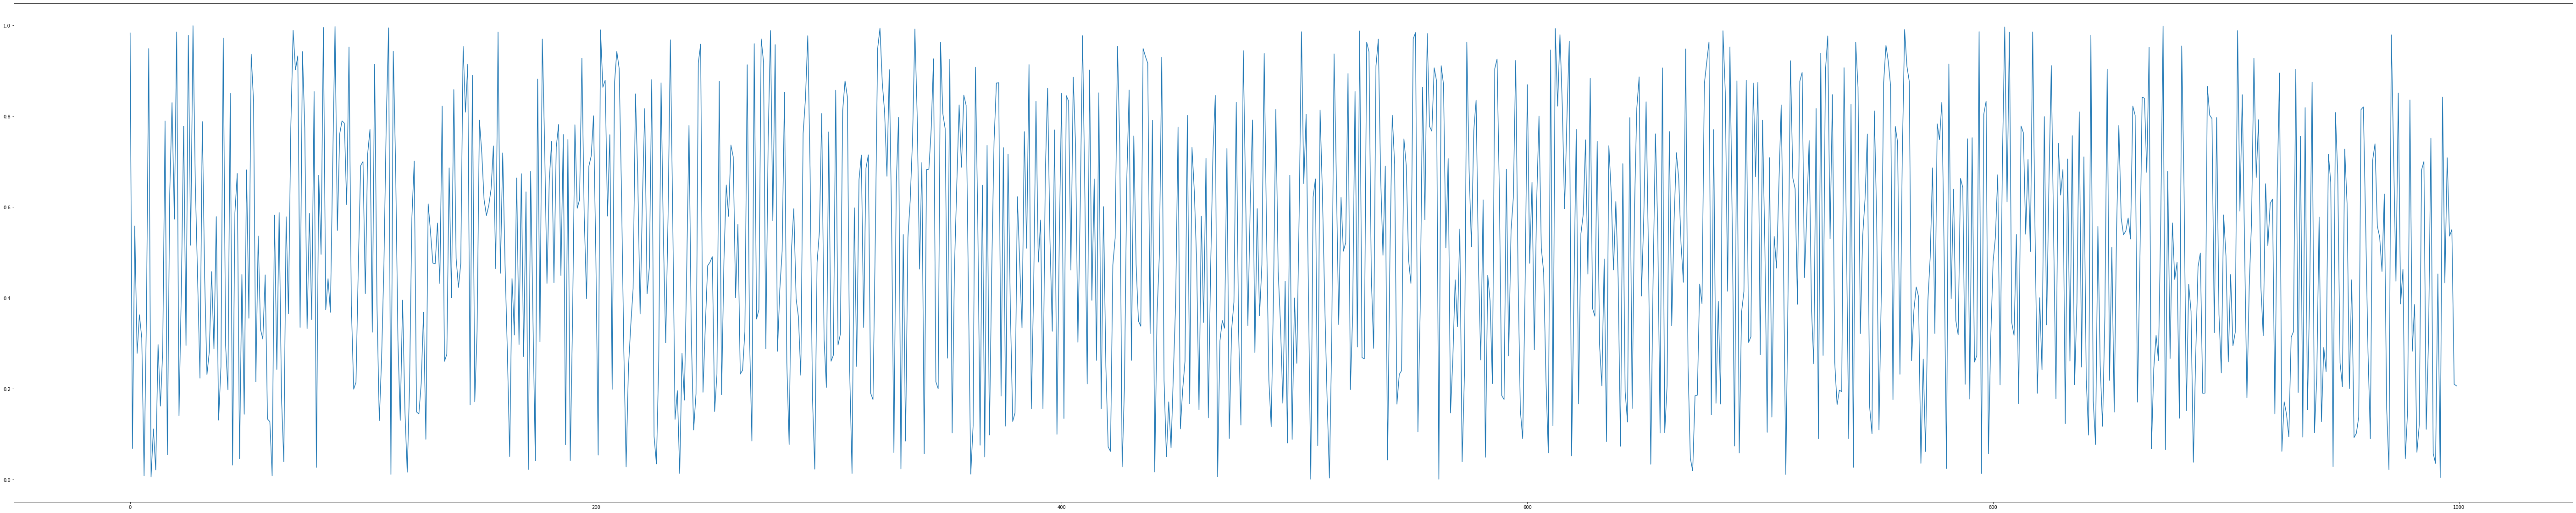

In [ ]:
plt.figure(figsize=[100, 20])
plt.plot(np.arange(0, 1000), data)
plt.show()

다음으로, 해당 샘플 데이터를 1칸씩 이동하며 10개씩 데이터를 잘라, x값으로 사용하고, y값은 11번째 데이터로 사용하겠습니다.  
예) x = 1번째 ~ 10번째 데이터 / y = 11번째

질문) 길이가 1000인 data를 이용해, 몇 쌍의 x, y 데이터를 만들어낼 수 있을까요?


In [ ]:
x_sin = np.array([[[data[i+j]] for j in range(10)] for i in range(len(data)-9-1)])
y_sin = np.array([[data[i+10]] for i in range(len(data)-10)])
x_sin.shape, y_sin.shape

((990, 10, 1), (990, 1))

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x_sin, y_sin, test_size=0.25, random_state=42)

In [ ]:
# shuffle = False로 명시하면, 데이터셋 순차적으로 split
x_train, x_test, y_train, y_test = train_test_split(x_sin, y_sin, shuffle=False) 

In [ ]:
x_train.shape, x_test.shape, y_train.shape

((742, 10, 1), (248, 10, 1), (742, 1))

In [ ]:
y_train

array([[1.11494573e-01],
       [2.12492087e-02],
       [2.97385477e-01],
       [1.61926884e-01],
       [2.81772391e-01],
       [7.89425261e-01],
       [5.46503779e-02],
       [6.28026102e-01],
       [8.29518595e-01],
       [5.73130580e-01],
       [9.85243344e-01],
       [1.40836147e-01],
       [4.19125090e-01],
       [7.78029389e-01],
       [2.95042259e-01],
       [9.77710995e-01],
       [5.15813423e-01],
       [9.98963202e-01],
       [6.53101556e-01],
       [4.39145108e-01],
       [2.23426437e-01],
       [7.87963452e-01],
       [4.47128058e-01],
       [2.31227154e-01],
       [2.81169318e-01],
       [4.57711248e-01],
       [2.87284732e-01],
       [5.78892958e-01],
       [1.30898965e-01],
       [2.48239198e-01],
       [9.71578892e-01],
       [2.95666902e-01],
       [1.97761790e-01],
       [8.50027506e-01],
       [3.18416334e-02],
       [5.86507734e-01],
       [6.73770019e-01],
       [4.62044836e-02],
       [4.51490069e-01],
       [1.43809873e-01],


질문)
예측해야 하는 값?: real_value(not categorical)  
측정 지표?: ?



RNN은 모델은 크게 SimpleRNN, LSTM, GRU 모델이 있습니다.  

가장 기본이 되는 SimpleRNN부터 살펴보겠습니다.  
RNN layer를 사용할 때 주요 **hyper parameter**는 두가지입니다.  
1) units = hidden_layer(Memory Cell)의 node 개수입니다.  
2) return_sequences = output Shape으로 sequence의 길이를 포함할지 말지를 정하기 위한 파라미터입니다. -> hidden_layer를 다층으로 연결하려면 True로 줘야합니다.
==> 다음 layer로 sequence를 전달하기 위함. 



In [ ]:
layers.Dense?

In [ ]:
x_train.shape

(742, 10, 1)

In [ ]:
model = models.Sequential() #모델 호출
model.add(layers.SimpleRNN(units=8,input_shape = (10,1), name='SimpleRNN-1')) # RNN 호출
model.add(layers.Dense(1, name='hidden-to-output')) # 출력을 위한 FFN

model.compile(optimizer='adam', loss='mse')
model.fit(x_train,y_train,epochs=5,verbose=1)

Epoch 1/5
24/24 [==============================] - 0s 11ms/step - loss: 1.4063
Epoch 2/5
24/24 [==============================] - 0s 11ms/step - loss: 0.7693
Epoch 3/5
24/24 [==============================] - 0s 10ms/step - loss: 0.4713
Epoch 4/5
24/24 [==============================] - 0s 11ms/step - loss: 0.3302
Epoch 5/5
24/24 [==============================] - 0s 11ms/step - loss: 0.2499


- 모델을 이해하려면 weight 개수(W0\~Wn)를 세어봐야 합니다.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
SimpleRNN-1 (SimpleRNN)      (None, 8)                 80        
_________________________________________________________________
hidden-to-output (Dense)     (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.predict(x_train).shape

(742, 1)

kernel은 input의 weight (W1\~Wn)  
bias는 W0  
recurrent_kernel은 순환에 대한 weight (W1~Wn)  


In [ ]:
for model_weight in model.weights:
    print(model_weight.name, ' => ', model_weight.shape)

SimpleRNN-1/simple_rnn_cell/kernel:0  =>  (1, 8)
SimpleRNN-1/simple_rnn_cell/recurrent_kernel:0  =>  (8, 8)
SimpleRNN-1/simple_rnn_cell/bias:0  =>  (8,)
hidden-to-output/kernel:0  =>  (8, 1)
hidden-to-output/bias:0  =>  (1,)


[실제 예측하기]
- 보라색이 실제 값,
- 빨간색이 예측값

In [ ]:
y_hat = model.predict(x_test) #테스트 값 예측
x_test.shape

(248, 10, 1)

In [ ]:
y_hat.shape

(248, 1)

In [ ]:
y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(100,30))
plt.plot(y_axis, y_train.reshape(len(x_train),), '-o') #Train데이터 그래프로 표현
plt.plot(y_2_axis, y_hat.reshape(len(x_test),), '-o', color='red', label='predicted') #x_test 예측값 그래프로 표현
plt.plot(y_2_axis, y_test.reshape(len(x_test),), '-o', color='purple', alpha=0.3, label='actual') #y_test 실제값 그래프로 표현 
plt.legend(fontsize=40)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### 1-2 다층 SimpleRNN 실습 
이번엔 SimpleRNN layer를 추가해봅시다.  
핵심 개념은 layer의 깊이와 Sequence의 길이를 헷갈리지 않는 것입니다.  
위에서 살펴본 단층 SimpleRNN은 layer의 깊이는 1이고, Sequence의 길이가 10입니다.  
이번에는 SimpleRNN의 layer의 깊이를 3으로 높여봅시다.

 Q!. SimpleRNN layer깊이 3으로 실습
 - return_sequences=True로 바꿔줘야합니다. (Sequence 전체가 온전히 들어가기 위해서)

### 모델 작성.
1. layer1: SimpleRNN 8
2. layer2: SimpleRNN 8
3. layer3: SimpleRNN 4
4. output_layer:  Dense 1 # 값이 하나 ManyToOne

In [ ]:
model = models.Sequential()


model.add(layers.SimpleRNN(8, input_shape=(10,1), return_sequences=True, 
                           name= 'rnn-1')) # weight개수: (8 + 1 +1) *8 = 80
model.add(layers.SimpleRNN(8, return_sequences=True,
                           name= 'rnn-2')) # weight 개수: (8 + 8 + 1) * 8
model.add(layers.SimpleRNN(4, name= 'rnn-3')) # weight: (4 + 8 + 1)*4
model.add(layers.Dense(1)) # 5

model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
24/24 [==============================] - 1s 30ms/step - loss: 0.8171
Epoch 2/10
24/24 [==============================] - 1s 30ms/step - loss: 0.4001
Epoch 3/10
24/24 [==============================] - 1s 30ms/step - loss: 0.2702
Epoch 4/10
24/24 [==============================] - 1s 30ms/step - loss: 0.1982
Epoch 5/10
24/24 [==============================] - 1s 31ms/step - loss: 0.1556
Epoch 6/10
24/24 [==============================] - 1s 28ms/step - loss: 0.1257
Epoch 7/10
24/24 [==============================] - 1s 29ms/step - loss: 0.1092
Epoch 8/10
24/24 [==============================] - 1s 30ms/step - loss: 0.0995
Epoch 9/10
24/24 [==============================] - 1s 30ms/step - loss: 0.0940
Epoch 10/10
24/24 [==============================] - 1s 30ms/step - loss: 0.0907


In [ ]:
layers.SimpleRNN?

In [ ]:
(8 + 8 + 1) * 8, (4 + 8 + 1)*4

(136, 52)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rnn-1 (SimpleRNN)            (None, 10, 8)             80        
_________________________________________________________________
rnn-2 (SimpleRNN)            (None, 10, 8)             136       
_________________________________________________________________
rnn-3 (SimpleRNN)            (None, 4)                 52        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


kernel은 input의 weight (W1\~Wn)  
bias는 W0  
recurrent_kernel은 순환에 대한 weight (W1~Wn)  


In [ ]:
for model_weight in model.weights:
    print(model_weight.name, '=>', model_weight.shape)

rnn-1/simple_rnn_cell_1/kernel:0 => (1, 8)
rnn-1/simple_rnn_cell_1/recurrent_kernel:0 => (8, 8)
rnn-1/simple_rnn_cell_1/bias:0 => (8,)
rnn-2/simple_rnn_cell_2/kernel:0 => (8, 8)
rnn-2/simple_rnn_cell_2/recurrent_kernel:0 => (8, 8)
rnn-2/simple_rnn_cell_2/bias:0 => (8,)
rnn-3/simple_rnn_cell_3/kernel:0 => (8, 4)
rnn-3/simple_rnn_cell_3/recurrent_kernel:0 => (4, 4)
rnn-3/simple_rnn_cell_3/bias:0 => (4,)
dense/kernel:0 => (4, 1)
dense/bias:0 => (1,)


In [ ]:
y_hat = model.predict(x_test)

[실제 예측하기]
- 보라색이 실제 값,
- 빨간색이 예측값

In [ ]:
y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(100,30))
plt.plot(y_axis, y_train.reshape(len(x_train),), '-o') #Train데이터 그래프로 표현
plt.plot(y_2_axis, y_hat.reshape(len(x_test),), '-o', color='red', label='predicted') #x_test 예측값 그래프로 표현
plt.plot(y_2_axis, y_test.reshape(len(x_test),), '-o', color='purple', alpha=0.3, label='actual') #y_test 실제값 그래프로 표현 
plt.legend(fontsize=40)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### 1-3 LSTM 실습

RNN의 Degradation 문제를 해결한 LSTM 모형을 구현해보겠습니다.  
  
정작 코드로 구현하는 것은 단순합니다.  
layer의 구조를 SimpleRNN에서 LSTM만 바꾸면 됩니다.

우선, 단층 LSTM을 구현해보자.

In [ ]:
model = models.Sequential()
model.add(layers.LSTM(10, input_shape = (10,1))) # (10 +  1 + 1) *4 * 10 
model.add(layers.Dense(1))

model.compile(optimizer='adam',loss='mse')
model.fit(x_train,y_train,epochs=10,verbose=0)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for model_weight in model.weights:
    print(model_weight.name, '->', model_weight.shape)

lstm/lstm_cell/kernel:0 -> (1, 40)
lstm/lstm_cell/recurrent_kernel:0 -> (10, 40)
lstm/lstm_cell/bias:0 -> (40,)
dense_1/kernel:0 -> (10, 1)
dense_1/bias:0 -> (1,)


In [ ]:
y_hat = model.predict(x_test)

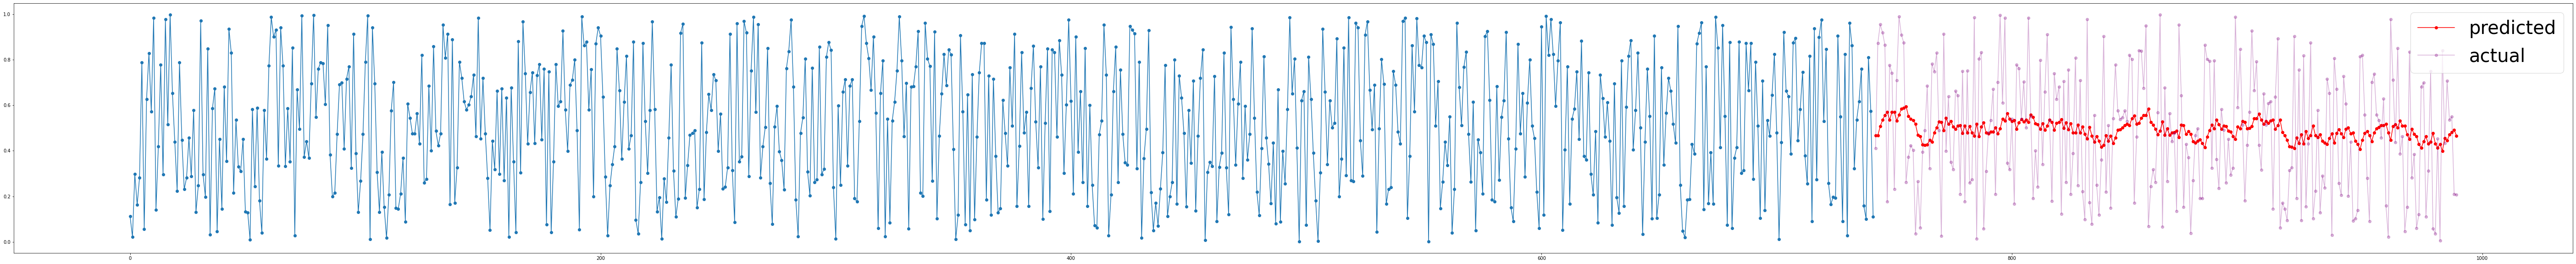

In [ ]:
y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(100,10))
plt.plot(y_axis, y_train.reshape(len(x_train),), '-o') #Train데이터 그래프로 표현
plt.plot(y_2_axis, y_hat.reshape(len(x_test),), '-o', color='red', label='predicted') #x_test 예측값 그래프로 표현
plt.plot(y_2_axis, y_test.reshape(len(x_test),), '-o', color='purple', alpha=0.3, label='actual') #y_test 실제값 그래프로 표현 
plt.legend(fontsize=40)
plt.show()

다층 LSTM도 SimpleRNN과 구현하는 방식은 동일하다.

In [ ]:
model = models.Sequential()
model.add(layers.LSTM(10,input_shape = (10,1), return_sequences=True)) # (10 + 1 + +1) * 4 * 10
model.add(layers.LSTM(10)) # (10 + 10 + 1) * 4 *10
model.add(layers.Dense(1))

model.compile(optimizer='adam',loss='mse')
model.fit(x_train,y_train,epochs=10,verbose=2)

Epoch 1/10
24/24 - 0s - loss: 0.1171
Epoch 2/10
24/24 - 0s - loss: 0.0850
Epoch 3/10
24/24 - 0s - loss: 0.0846
Epoch 4/10
24/24 - 0s - loss: 0.0856
Epoch 5/10
24/24 - 0s - loss: 0.0842
Epoch 6/10
24/24 - 0s - loss: 0.0836
Epoch 7/10
24/24 - 0s - loss: 0.0842
Epoch 8/10
24/24 - 0s - loss: 0.0878
Epoch 9/10
24/24 - 0s - loss: 0.0837
Epoch 10/10
24/24 - 0s - loss: 0.0844


In [ ]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 10, 320)           412160    
_________________________________________________________________
lstm_43 (LSTM)               (None, 30)                42120     
_________________________________________________________________
dense_36 (Dense)             (None, 128)               3968      
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_38 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 33        
Total params: 468,617
Trainable params: 468,617
Non-trainable params: 0
_______________________________________________

In [ ]:
for model_weight in model.weights:
    print(model_weight.name, '->', model_weight.shape)

lstm_42/lstm_cell_42/kernel:0 -> (1, 1280)
lstm_42/lstm_cell_42/recurrent_kernel:0 -> (320, 1280)
lstm_42/lstm_cell_42/bias:0 -> (1280,)
lstm_43/lstm_cell_43/kernel:0 -> (320, 120)
lstm_43/lstm_cell_43/recurrent_kernel:0 -> (30, 120)
lstm_43/lstm_cell_43/bias:0 -> (120,)
dense_36/kernel:0 -> (30, 128)
dense_36/bias:0 -> (128,)
dense_37/kernel:0 -> (128, 64)
dense_37/bias:0 -> (64,)
dense_38/kernel:0 -> (64, 32)
dense_38/bias:0 -> (32,)
dense_39/kernel:0 -> (32, 1)
dense_39/bias:0 -> (1,)


In [ ]:
y_hat = model.predict(x_test)

In [ ]:
y_train_hat = model.predict(x_train)

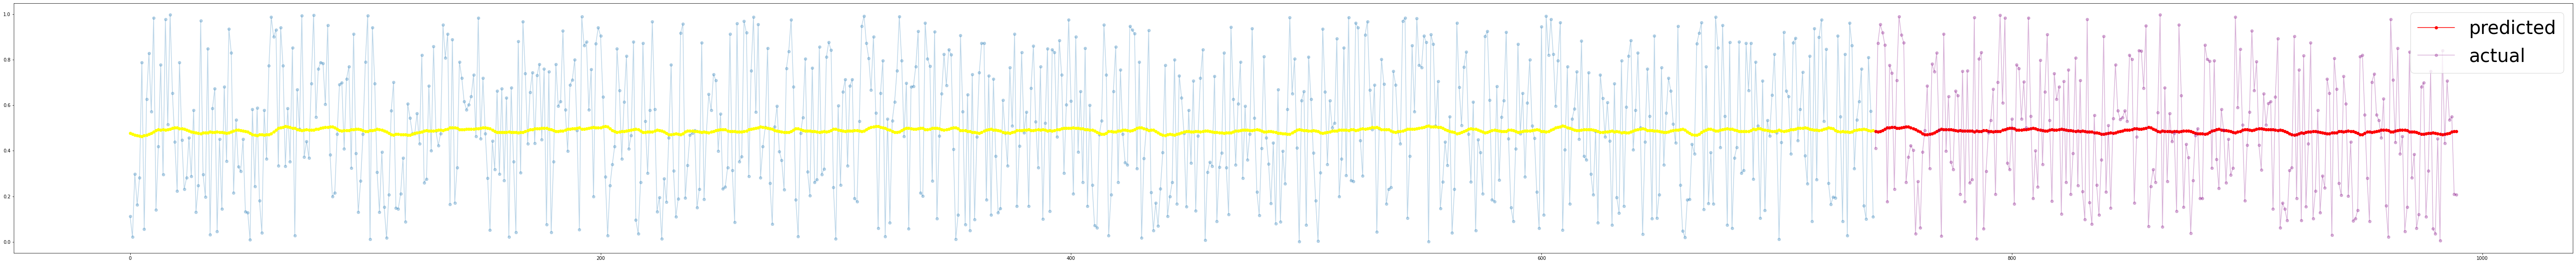

In [ ]:
y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(100,10))
plt.plot(y_axis, y_train.reshape(len(x_train),), '-o', alpha=0.3) #Train데이터 그래프로 표현
plt.plot(y_axis, y_train_hat.reshape(len(x_train),), '-o', c='yellow') #Train데이터 그래프로 표현
plt.plot(y_2_axis, y_hat.reshape(len(x_test),), '-o', color='red', label='predicted') #x_test 예측값 그래프로 표현
plt.plot(y_2_axis, y_test.reshape(len(x_test),), '-o', color='purple', alpha=0.3, label='actual') #y_test 실제값 그래프로 표현 
plt.legend(fontsize=40)
plt.show()

### 1-4 GRU


이번엔 LSTM을 발전시킨 GRU 모형을 구현해보겠습니다.

In [ ]:
model = models.Sequential()

# ((10 + 1 + 1)* 3) * 10
model.add(layers.GRU(10, input_shape = (10,1), return_sequences=True, reset_after=False)) #GRU를 호출
model.add(layers.GRU(8, reset_after=False)) # ((8 + 10 + 1) *3) * 8
model.add(layers.Dense(1)) # 9

model.compile(optimizer='adam',loss='mse')
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
24/24 [==============================] - 1s 62ms/step - loss: 0.1689
Epoch 2/10
24/24 [==============================] - 2s 63ms/step - loss: 0.0889
Epoch 3/10
24/24 [==============================] - 1s 62ms/step - loss: 0.0864
Epoch 4/10
24/24 [==============================] - 1s 62ms/step - loss: 0.0865
Epoch 5/10
24/24 [==============================] - 2s 64ms/step - loss: 0.0861
Epoch 6/10
24/24 [==============================] - 1s 61ms/step - loss: 0.0857
Epoch 7/10
24/24 [==============================] - 1s 62ms/step - loss: 0.0856
Epoch 8/10
24/24 [==============================] - 2s 65ms/step - loss: 0.0854
Epoch 9/10
24/24 [==============================] - 2s 63ms/step - loss: 0.0854
Epoch 10/10
24/24 [==============================] - 1s 62ms/step - loss: 0.0855


In [ ]:
((8 + 10 + 1) *3) * 8

456

In [ ]:
layers.GRU

tensorflow.python.keras.layers.recurrent_v2.GRU

In [ ]:
model.layers[0].weights

[<tf.Variable 'gru_10/gru_cell_11/kernel:0' shape=(1, 30) dtype=float32, numpy=
 array([[-0.13185416,  0.06657682,  0.19634362,  0.38984936,  0.26204026,
          0.13370885, -0.0297175 ,  0.20159794,  0.18820696,  0.11194633,
          0.1558072 , -0.29251203,  0.32614774,  0.26376233,  0.2216425 ,
         -0.1805647 , -0.06441666, -0.22414927, -0.29755116, -0.21188307,
          0.3366511 ,  0.31933755,  0.05366476, -0.39426613, -0.11149424,
          0.19394861, -0.08301584, -0.24228196,  0.11403996, -0.25818145]],
       dtype=float32)>,
 <tf.Variable 'gru_10/gru_cell_11/recurrent_kernel:0' shape=(10, 30) dtype=float32, numpy=
 array([[-4.97907884e-02,  1.19943239e-01,  9.09757465e-02,
          5.86087145e-02,  2.12802410e-01,  3.47712003e-02,
          1.96475238e-02,  8.62348974e-02,  2.26035103e-01,
          3.72496456e-01,  1.44702122e-01, -3.67141843e-01,
          3.29357624e-01, -1.42898098e-01, -5.97080216e-02,
         -2.23014206e-01,  2.18985394e-01, -2.40483582e-02,

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_10 (GRU)                 (None, 10, 10)            360       
_________________________________________________________________
gru_11 (GRU)                 (None, 8)                 456       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 825
Trainable params: 825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_10 (GRU)                 (None, 10, 10)            360       
_________________________________________________________________
gru_11 (GRU)                 (None, 8)                 456       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 825
Trainable params: 825
Non-trainable params: 0
_________________________________________________________________


In [ ]:

for model_weight in model.weights:
    print(model_weight.name, '->', model_weight.shape)
    print(model_weight.numpy)

gru_10/gru_cell_11/kernel:0 -> (1, 30)
<bound method BaseResourceVariable.numpy of <tf.Variable 'gru_10/gru_cell_11/kernel:0' shape=(1, 30) dtype=float32, numpy=
array([[-0.13185416,  0.06657682,  0.19634362,  0.38984936,  0.26204026,
         0.13370885, -0.0297175 ,  0.20159794,  0.18820696,  0.11194633,
         0.1558072 , -0.29251203,  0.32614774,  0.26376233,  0.2216425 ,
        -0.1805647 , -0.06441666, -0.22414927, -0.29755116, -0.21188307,
         0.3366511 ,  0.31933755,  0.05366476, -0.39426613, -0.11149424,
         0.19394861, -0.08301584, -0.24228196,  0.11403996, -0.25818145]],
      dtype=float32)>>
gru_10/gru_cell_11/recurrent_kernel:0 -> (10, 30)
<bound method BaseResourceVariable.numpy of <tf.Variable 'gru_10/gru_cell_11/recurrent_kernel:0' shape=(10, 30) dtype=float32, numpy=
array([[-4.97907884e-02,  1.19943239e-01,  9.09757465e-02,
         5.86087145e-02,  2.12802410e-01,  3.47712003e-02,
         1.96475238e-02,  8.62348974e-02,  2.26035103e-01,
         3.724

In [ ]:
y_hat = model.predict(x_test)

In [ ]:
y_train.shape

(742, 1)

In [ ]:
y_hat.shape

(248, 1)

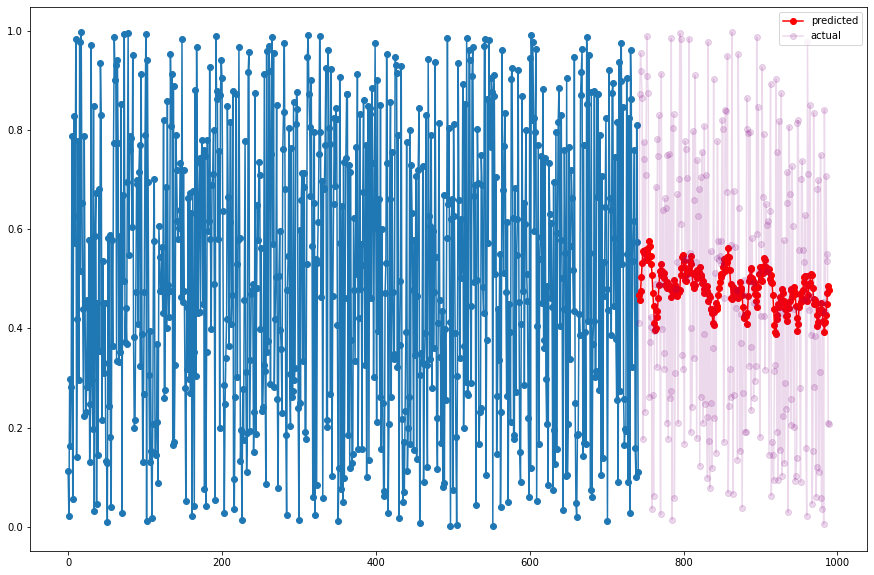

In [ ]:
y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(15,10))
plt.plot(y_axis, y_train, '-o') #Train데이터 그래프로 표현
plt.plot(y_2_axis, y_hat, '-o', color='red', label='predicted') #x_test 예측값 그래프로 표현
plt.plot(y_2_axis, y_test, '-o', color='purple', alpha=0.15, label='actual') #y_test 실제값 그래프로 표현 
plt.legend()
plt.show()

### 1-4 다층 LSTM

CNN처럼 RNN도 층을 쌓을 수 있습니다.  
하지만 RNN의 기본적인 출력은 many to one 이다보니   
무척대고 층을 쌓게되면 에러가 발생하는것을 알수 가 있습니다.  
그래서 return_sequences를 True로 하면 many to many로 바뀌게 되고,
층을 쌓으면 문제없이 돌아가는 것을 알 수가 잇습니다.  


마지막 출력 부분은 many to many가 아닌 many to one입니다.

In [ ]:
model = models.Sequential()
model.add((layers.SimpleRNN(8,input_shape = (10,1),return_sequences=True)))
model.add(layers.SimpleRNN(4))
model.add(layers.Dense(1))

model.compile(optimizer='adam',loss='mse')
model.fit(x_train,y_train,epochs=500,verbose=0)

In [ ]:
y_hat = model.predict(x_test)

In [ ]:
y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(15,10))
plt.plot(y_axis, y_train.reshape(70,), '-o')
plt.plot(y_2_axis, y_hat.reshape(20,), '-o', color='red', label='predicted')
plt.plot(y_2_axis, y_test.reshape(20,), '-o', color='purple', alpha=0.15, label='actual')
plt.legend()
plt.show()

### 1-7 Quiz1) 지워진 코드를 채워보자

LSTM 실습도중에 코랩이 팅겨 코드의 일부분이 지워져 버렸다.  
최종적으로 예측 데이터와 실제데이터 비교하는 그래프까지 출력을 해보자



In [ ]:
callbacks = [
             tf.keras.callbacks.EarlyStopping(monitor='loss', )
]

In [ ]:
data = np.sin( np.pi * np.arange(0, 100)* 2.025 ) + np.random.random(100)
x = np.array([data[i+j] for i in range(len(data)-10) for j in range(10)])
x_train = x[:700].reshape(-1,10,1)
x_test = x[700:].reshape(-1,10,1)
y = np.array([data[i+10] for i in range(len(data)-10)])
y_train = y[:70].reshape(-1,1)
y_test = y[70:].reshape(-1,1)


model = models.Sequential()

#### 문제 1 ####
model.add(layers.SimpleRNN(20, recurrent_dropout=0.4)) # RNN 사용하여 채워보자!
################

model.add(layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.RMSprop(),loss='mse')
model.fit(x_train, y_train, epochs=800,verbose=1)

#### 문제 2 ####
y_train_hat = model.predict(x_train)
y_hat = model.predict(x_test)# 학습한 모델을 이용해서 예측을 해보자
################


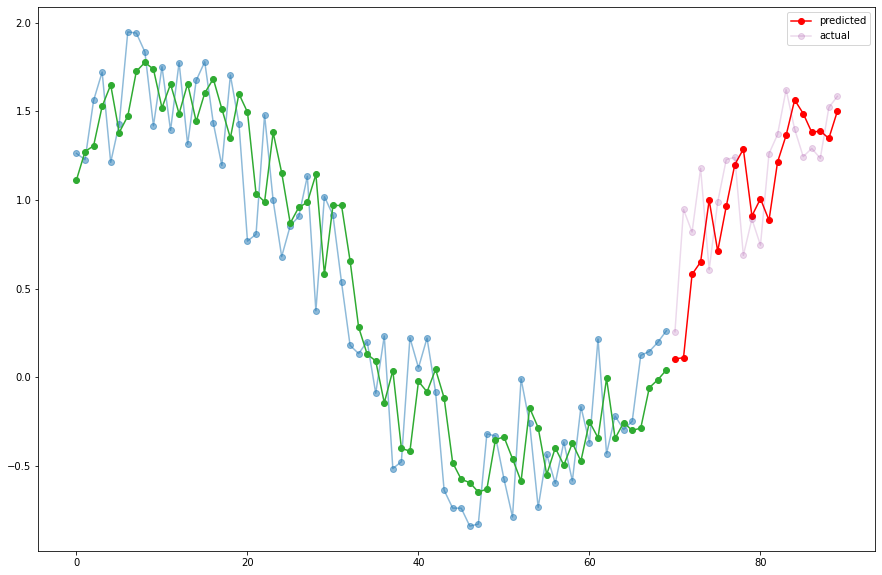

In [ ]:

y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(15,10))
plt.plot(y_axis, y_train.reshape(70,), '-o', alpha=0.5) 
plt.plot(y_axis, y_train_hat.reshape(70,), '-o', c='#2fab32', ) 
plt.plot(y_2_axis, y_hat.reshape(20,), '-o', color='red', label='predicted') 
plt.plot(y_2_axis, y_test.reshape(20,), '-o', color='purple', alpha=0.15, label='actual')
plt.legend()
plt.show()

#### Answer) 

In [ ]:
data = np.sin( np.pi * np.arange(0, 100)* 2.025 ) + np.random.random(100)
x = np.array([data[i+j] for i in range(len(data)-10) for j in range(10)])
x_train = x[:700].reshape(-1,10,1)
x_test = x[700:].reshape(-1,10,1)
y = np.array([data[i+10] for i in range(len(data)-10)])
y_train = y[:70].reshape(-1,1)
y_test = y[70:].reshape(-1,1)


model = models.Sequential()

#### 문제 1 ####
model.add() # RNN 사용하여 채워보자!
################

model.add(layers.Dense(1))

model.compile(optimizer='RMSProp',loss='mse')
model.fit(,epochs=500,verbose=0)

#### 문제 2 ####
y_hat = # 학습한 모델을 이용해서 예측을 해보자
################

y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(15,10))
plt.plot(y_axis, y_train.reshape(70,), '-o') 
plt.plot(y_2_axis, y_hat.reshape(20,), '-o', color='red', label='predicted') 
plt.plot(y_2_axis, y_test.reshape(20,), '-o', color='purple', alpha=0.15, label='actual')
plt.legend()
plt.show()

SyntaxError: ignored

### 1-8 Quiz2) 지워진 코드를 채워보자2

다층 RNN 실습 도중 정전이 발생하여 코드가 날라가는 일이 발생하였습니다.  
최종적으로 예측 데이터와 실제데이터 비교하는 그래프까지 출력을 해보자

In [ ]:
data = np.sin( np.pi * np.arange(0, 100)* 2.025 ) + np.random.random(100)

x = np.array([data[i+j] for i in range(len(data)-10) for j in range(10)])
x_train = x[:700].reshape(-1,10,1)
x_test = x[700:].reshape(-1,10,1)

y = np.array([data[i+10] for i in range(len(data)-10)])
y_train = y[:70].reshape(-1,1)
y_test = y[70:].reshape(-1,1)

#### 문제 1 ####
model = # 모델 만들기
################

model.add(layers.GRU(16,input_shape = (10,1),return_sequences=True))

#### 문제 2 ####
model.add() #RNN 한층 더 쌓기
###############

model.add(layers.GRU(4,input_shape = (10,1)))
model.add(layers.Dense(1))

model.compile(optimizer='adam',loss='mse')

#### 문제 3 ####
model. # 모델 학습
################

y_hat = model.predict(x_test)
y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(15,10))
plt.plot(y_axis, y_train.reshape(70,), '-o') 
plt.plot(y_2_axis, y_hat.reshape(20,), '-o', color='red', label='predicted')
plt.plot(y_2_axis, y_test.reshape(20,), '-o', color='purple', alpha=0.15, label='actual') 
plt.legend()
plt.show()

#### Answer)

In [ ]:
data = np.sin( np.pi * np.arange(0, 100)* 2.025 ) + np.random.random(100)

x = np.array([data[i+j] for i in range(len(data)-10) for j in range(10)])
x_train = x[:700].reshape(-1,10,1)
x_test = x[700:].reshape(-1,10,1)

y = np.array([data[i+10] for i in range(len(data)-10)])
y_train = y[:70].reshape(-1,1)
y_test = y[70:].reshape(-1,1)

In [ ]:
x_train.shape, x_test.shape, y_train.shape

((70, 10, 1), (20, 10, 1), (70, 1))

In [ ]:
#### 문제 1 ####
model = tf.keras.Sequential()# 모델 만들기
################

model.add(layers.GRU(16, input_shape = (10,1),return_sequences=True))

#### 문제 2 ####
model.add(layers.GRU(8, return_sequences=True)) #RNN 한층 더 쌓기
###############

model.add(layers.GRU(4,input_shape = (10,1)))
model.add(layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.RMSprop(),loss='mse')

#### 문제 3 ####
model.fit(x_train, y_train, epochs=1500) # 모델 학습
################



Epoch 1/1500
3/3 [==============================] - 0s 8ms/step - loss: 1.0318
Epoch 2/1500
3/3 [==============================] - 0s 6ms/step - loss: 0.8293
Epoch 3/1500
3/3 [==============================] - 0s 6ms/step - loss: 0.7110
Epoch 4/1500
3/3 [==============================] - 0s 6ms/step - loss: 0.6447
Epoch 5/1500
3/3 [==============================] - 0s 6ms/step - loss: 0.5587
Epoch 6/1500
3/3 [==============================] - 0s 8ms/step - loss: 0.4852
Epoch 7/1500
3/3 [==============================] - 0s 7ms/step - loss: 0.4327
Epoch 8/1500
3/3 [==============================] - 0s 10ms/step - loss: 0.3781
Epoch 9/1500
3/3 [==============================] - 0s 7ms/step - loss: 0.3343
Epoch 10/1500
3/3 [==============================] - 0s 6ms/step - loss: 0.2875
Epoch 11/1500
3/3 [==============================] - 0s 7ms/step - loss: 0.2569
Epoch 12/1500
3/3 [==============================] - 0s 7ms/step - loss: 0.2322
Epoch 13/1500
3/3 [=============================

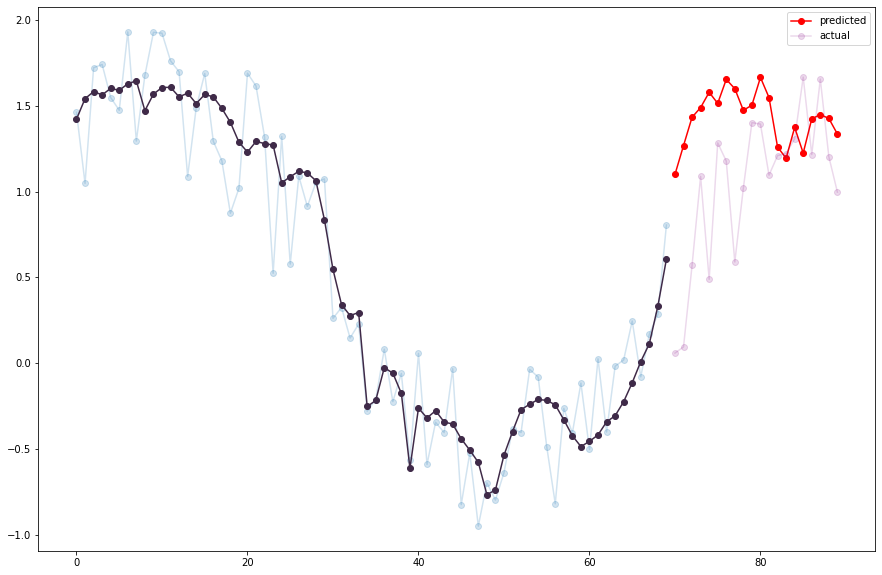

In [ ]:
y_hat = model.predict(x_test)
y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(15,10))
plt.plot(y_axis, y_train.reshape(70,), '-o', alpha=0.2)
plt.plot(y_axis, model.predict(x_train).reshape(70,), '-o', color='#3f2a48') 
plt.plot(y_2_axis, y_hat.reshape(20,), '-o', color='red', label='predicted')
plt.plot(y_2_axis, y_test.reshape(20,), '-o', color='purple', alpha=0.15, label='actual') 
plt.legend()
plt.show()

### 1-9 원달러 환율 예측

원달러 환율 900일 데이터를 가지고 확율 예측 모델을 만들겟습니다.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Dollor.xlsx to Dollor.xlsx


In [ ]:
import pandas as pd
Data = pd.read_excel('Dollor.xlsx')

In [ ]:
Data.shape

(900, 2)

In [ ]:
X = np.array(Data.iloc[:,1:]) 
X = (X-X.mean(axis=0))/X.std(axis=0) # 정규화

In [ ]:
X.mean(), X.std()

(-1.5631940186722204e-15, 0.9999999999999999)

900일동안 환율의 상태를 살펴보면 변동이 크게 있는 것을 알수가 있습니다.

No handles with labels found to put in legend.


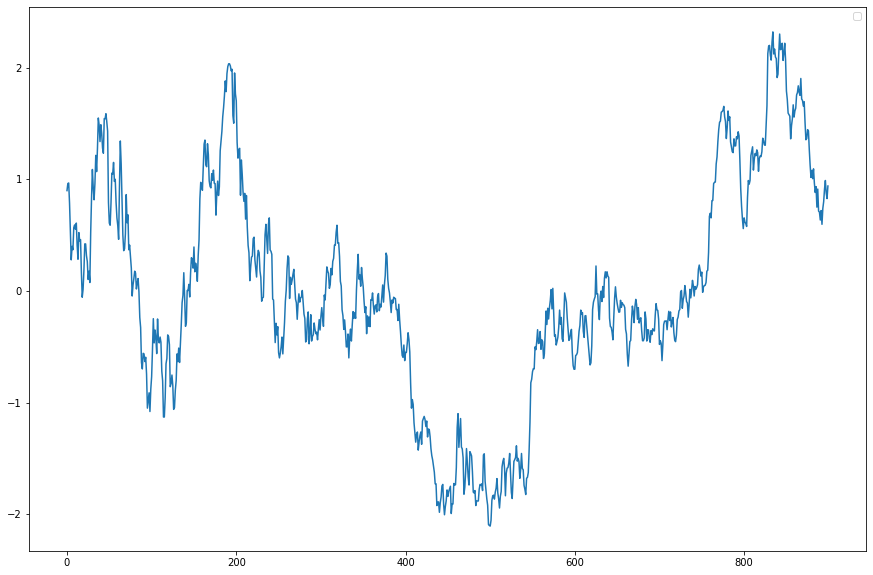

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(len(X)),X)
plt.legend()
plt.show()

#### Quiz)원달러환율 데이터셋을 이용한 모델 작성

여태까지 실습했던 내용으로 모델을 구축해보고   
예측했던 데이터와 실제 데이터를 비교하는 그래프를 그려보자  

학습데이터는 10일의 데이터를 가지고 다음날을 예측하면 됩니다.  
데이터의 70%는 학습데이터이고 30%는 테스트 데이터 셋입니다  
사용하는 모델을 자유입니다.

In [ ]:
#모델 작성
X.shape

(900, 1)

In [ ]:
dollar_data = X.copy()

In [ ]:
x_dollar = np.array([[[dollar_data.flatten()[i+j]] for j in range(10)] for i in range(len(dollar_data)-10)])
y_dollar = np.array([[dollar_data.ravel()[i+10]] for i in range(len(dollar_data)-10)])  
x_dollar.shape, y_dollar.shape

((890, 10, 1), (890, 1))

In [ ]:
x_train, x_test, y_train, y_test =  train_test_split(x_dollar, y_dollar, shuffle=False, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape

((623, 10, 1), (267, 10, 1), (623, 1))

In [ ]:
model = tf.keras.Sequential()
model.add(layers.LSTM(8, return_sequences=True))
model.add(layers.DropOut(0.2)) # 규제 (레이어간)
# model.add(layers.LSTM(8, return_sequences=True))
model.add(layers.LSTM(4, recurrent_dropout=0.2))
model.add(layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
               loss='mse')
model.fit(x_train, y_train, epochs=500, verbose=1)

Epoch 1/500
20/20 [==============================] - 0s 7ms/step - loss: 0.3755
Epoch 2/500
20/20 [==============================] - 0s 6ms/step - loss: 0.2697
Epoch 3/500
20/20 [==============================] - 0s 7ms/step - loss: 0.2092
Epoch 4/500
20/20 [==============================] - 0s 7ms/step - loss: 0.1690
Epoch 5/500
20/20 [==============================] - 0s 6ms/step - loss: 0.1414
Epoch 6/500
20/20 [==============================] - 0s 6ms/step - loss: 0.1214
Epoch 7/500
20/20 [==============================] - 0s 6ms/step - loss: 0.1065
Epoch 8/500
20/20 [==============================] - 0s 7ms/step - loss: 0.0950
Epoch 9/500
20/20 [==============================] - 0s 7ms/step - loss: 0.0859
Epoch 10/500
20/20 [==============================] - 0s 7ms/step - loss: 0.0784
Epoch 11/500
20/20 [==============================] - 0s 7ms/step - loss: 0.0727
Epoch 12/500
20/20 [==============================] - 0s 6ms/step - loss: 0.0685
Epoch 13/500
20/20 [=================

In [ ]:
x_train.shape

(623, 10, 1)

In [ ]:
y_train_hat = model.predict(x_train)
y_train_hat.shape

(623, 1)

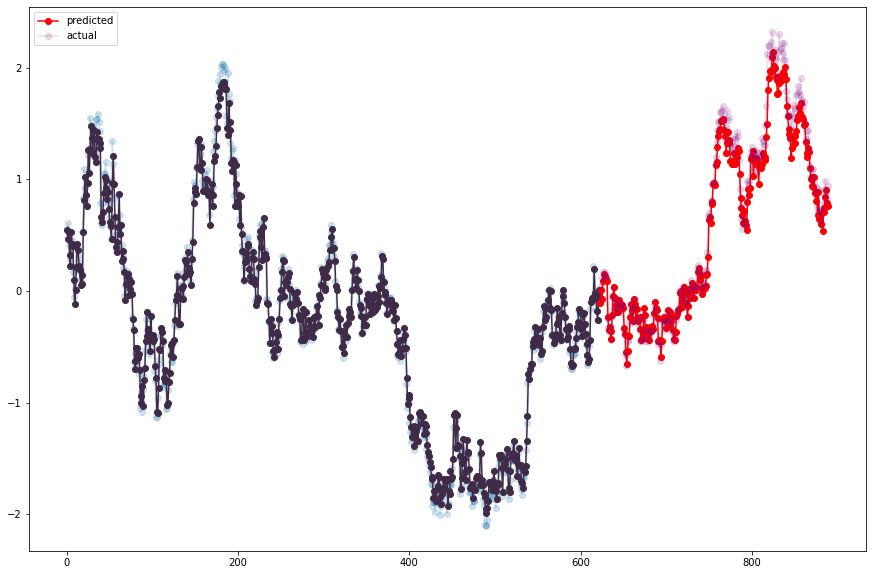

In [ ]:
y_hat = model.predict(x_test)
y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(15,10))
plt.plot(y_axis, y_train.reshape(-1,), '-o', alpha=0.2)
plt.plot(y_axis, y_train_hat.reshape(-1,), '-o', color='#3f2a48') 
plt.plot(y_2_axis, y_hat.reshape(-1,), '-o', color='red', label='predicted')
plt.plot(y_2_axis, y_test.reshape(-1,), '-o', color='purple', alpha=0.15, label='actual') 
plt.legend()
plt.show()

##### Answer)

독일에 있는 예나(제나) 도시를 막스 플랑크 생물지구화학 연구소의 지상 관측소에서 수년간 수집한 데이터로써 약 57만개의 데이터셋입니다.  



In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd


In [ ]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip #데이터셋 다운로드

--2020-07-02 00:06:39--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.169.117
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.169.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  12.7MB/s    in 1.0s    

2020-07-02 00:06:40 (12.7 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]



In [ ]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip #데이터셋 다운로드
!unzip jena_climate_2009_2016.csv.zip #데이터셋 압축풀기

--2020-07-02 00:06:42--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.114.213
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.114.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip.1’

jena_climate_2009_2 100%[===================>]  12.94M  12.7MB/s    in 1.0s    

2020-07-02 00:06:43 (12.7 MB/s) - ‘jena_climate_2009_2016.csv.zip.1’ saved [13568290/13568290]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


In [ ]:
import pandas as pd
Data = pd.read_csv('jena_climate_2009_2016.csv') #데이터셋 불러오기
# del Data['Date Time'] # 시간행 삭제

In [ ]:
del Data['Date Time']

In [ ]:
Data.shape

(420551, 14)

예나 데이터셋은 GRU모델로 시작해보겠습니다.
규제화를 주지 않고 GRU 모델만 사용해보겠습니다.

정규화는 20만개 데이터로 진행을 하겠고,
학습데이터는 만개 정도로만 할 예정입니다.
데이터가 많아지면 학습시간이 길어지기 때문에 일부분만 갖고 하겠습니다.
또한 항목은 14가지 정도 있지만 저희는 온도로만 작성하는 걸로 하겠습니다.

In [ ]:
Data.shape

(420551, 14)

In [ ]:
SAMPLE_SIZE = 200000
data = Data.iloc[:SAMPLE_SIZE, :]
data.shape

(200000, 14)

In [ ]:
def time_series_train_test_split(data, seq_len=10, test_size=0.2):
    """
    데이터를 타임시리즈로 만들고, train_test_split 함수
    """
    if not isinstance(data, np.array.__class__):
        # numpy배열이 아니라면 np.array
        data = np.array(data)
    
    X = []
    y = []
    batch_size = len(data) - seq_len
    for i in range(batch_size):
        X.append(
            data[i: i+seq_len]
        )
        y.append(
            data[i+seq_len]
        )
    X = np.array(X)
    y = np.array(y)

    test_idx = int(X.shape[0] * (1 - test_size))

    X_train = X[:test_idx]
    y_train = y[:test_idx]
    X_test = X[test_idx:]
    y_test = y[test_idx:]

    
    return (X_train, y_train), (X_test, y_test)



### Feature 선택

In [ ]:
data = Data.iloc[:, 1]
data.shape

(420551,)

In [ ]:
DATA_SIZE = 240000
data = data[:DATA_SIZE]

In [ ]:
(x_train, y_train), (x_test, y_test) = time_series_train_test_split(data, )
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((191992, 10), (191992,), (47998, 10), (47998,))

## 표준화(정규화)

In [ ]:
mean = x_train.mean()
std = x_train.std()
mean, std

(8.889353795991497, 8.91825700418926)

In [ ]:
x_train = (x_train - mean) / std
# y_train = (y_train - mean) / std
x_test = (x_test - mean) / std
# y_test = (y_test - mean) / std

In [ ]:
x_train.shape, y_train.shape, x_test.shape

((191992, 10), (191992,), (47998, 10))

In [ ]:
from tensorflow.keras import layers

In [ ]:
# 시계열 데이터 완성 하기
# reshape for layer(tf.RNN)
x_train = x_train.reshape(-1, 10, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 10, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
input_  = layers.Input((10,1))

x = layers.GRU(10, return_sequences=True)(input_)
x2 = layers.GRU(10, return_sequences=True)(x)
x = layers.GRU(5)(x2)
y = layers.Dense(1)(x)
model = tf.keras.Model(input_, y)

In [ ]:
z = layers.GRU(10, return_sequences=True)(x2)
z = layers.GRU(3)(z)
y2 = layers.Dense(1)(z)
model2 = tf.keras.Model(input_, y2)

model3 = tf.keras.Model(input_, [y, y2])

In [ ]:
model.compile(optimizer='adam',
              loss='mse')

In [ ]:
from tensorflow.keras.utils import plot_model 

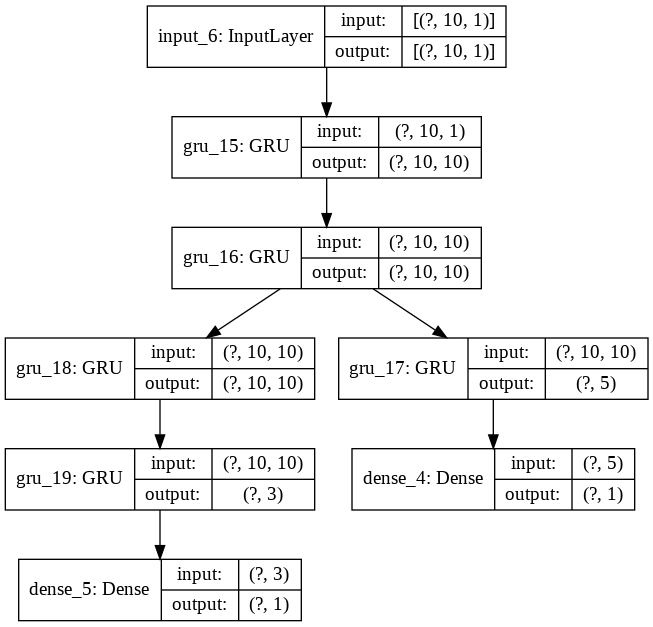

In [ ]:
plot_model(model3, show_shapes=True)

In [ ]:
y_train.mean(), y_train.std()

8.89016901745906

In [ ]:
model.compile(optimizer='adam',
              loss='mse')
model.fit(x_train, y_train, epochs=100)

Epoch 1/10
6000/6000 [==============================] - 38s 6ms/step - loss: 17.2623
Epoch 2/10
6000/6000 [==============================] - 38s 6ms/step - loss: 0.2928
Epoch 3/10
6000/6000 [==============================] - 39s 6ms/step - loss: 0.0605
Epoch 4/10
6000/6000 [==============================] - 38s 6ms/step - loss: 0.0509
Epoch 5/10
6000/6000 [==============================] - 38s 6ms/step - loss: 0.0494
Epoch 6/10
6000/6000 [==============================] - 38s 6ms/step - loss: 0.0486
Epoch 7/10
6000/6000 [==============================] - 38s 6ms/step - loss: 0.0484
Epoch 8/10
6000/6000 [==============================] - 38s 6ms/step - loss: 0.0481
Epoch 9/10
6000/6000 [==============================] - 38s 6ms/step - loss: 0.0477
Epoch 10/10
6000/6000 [==============================] - 38s 6ms/step - loss: 0.0477


In [ ]:
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)

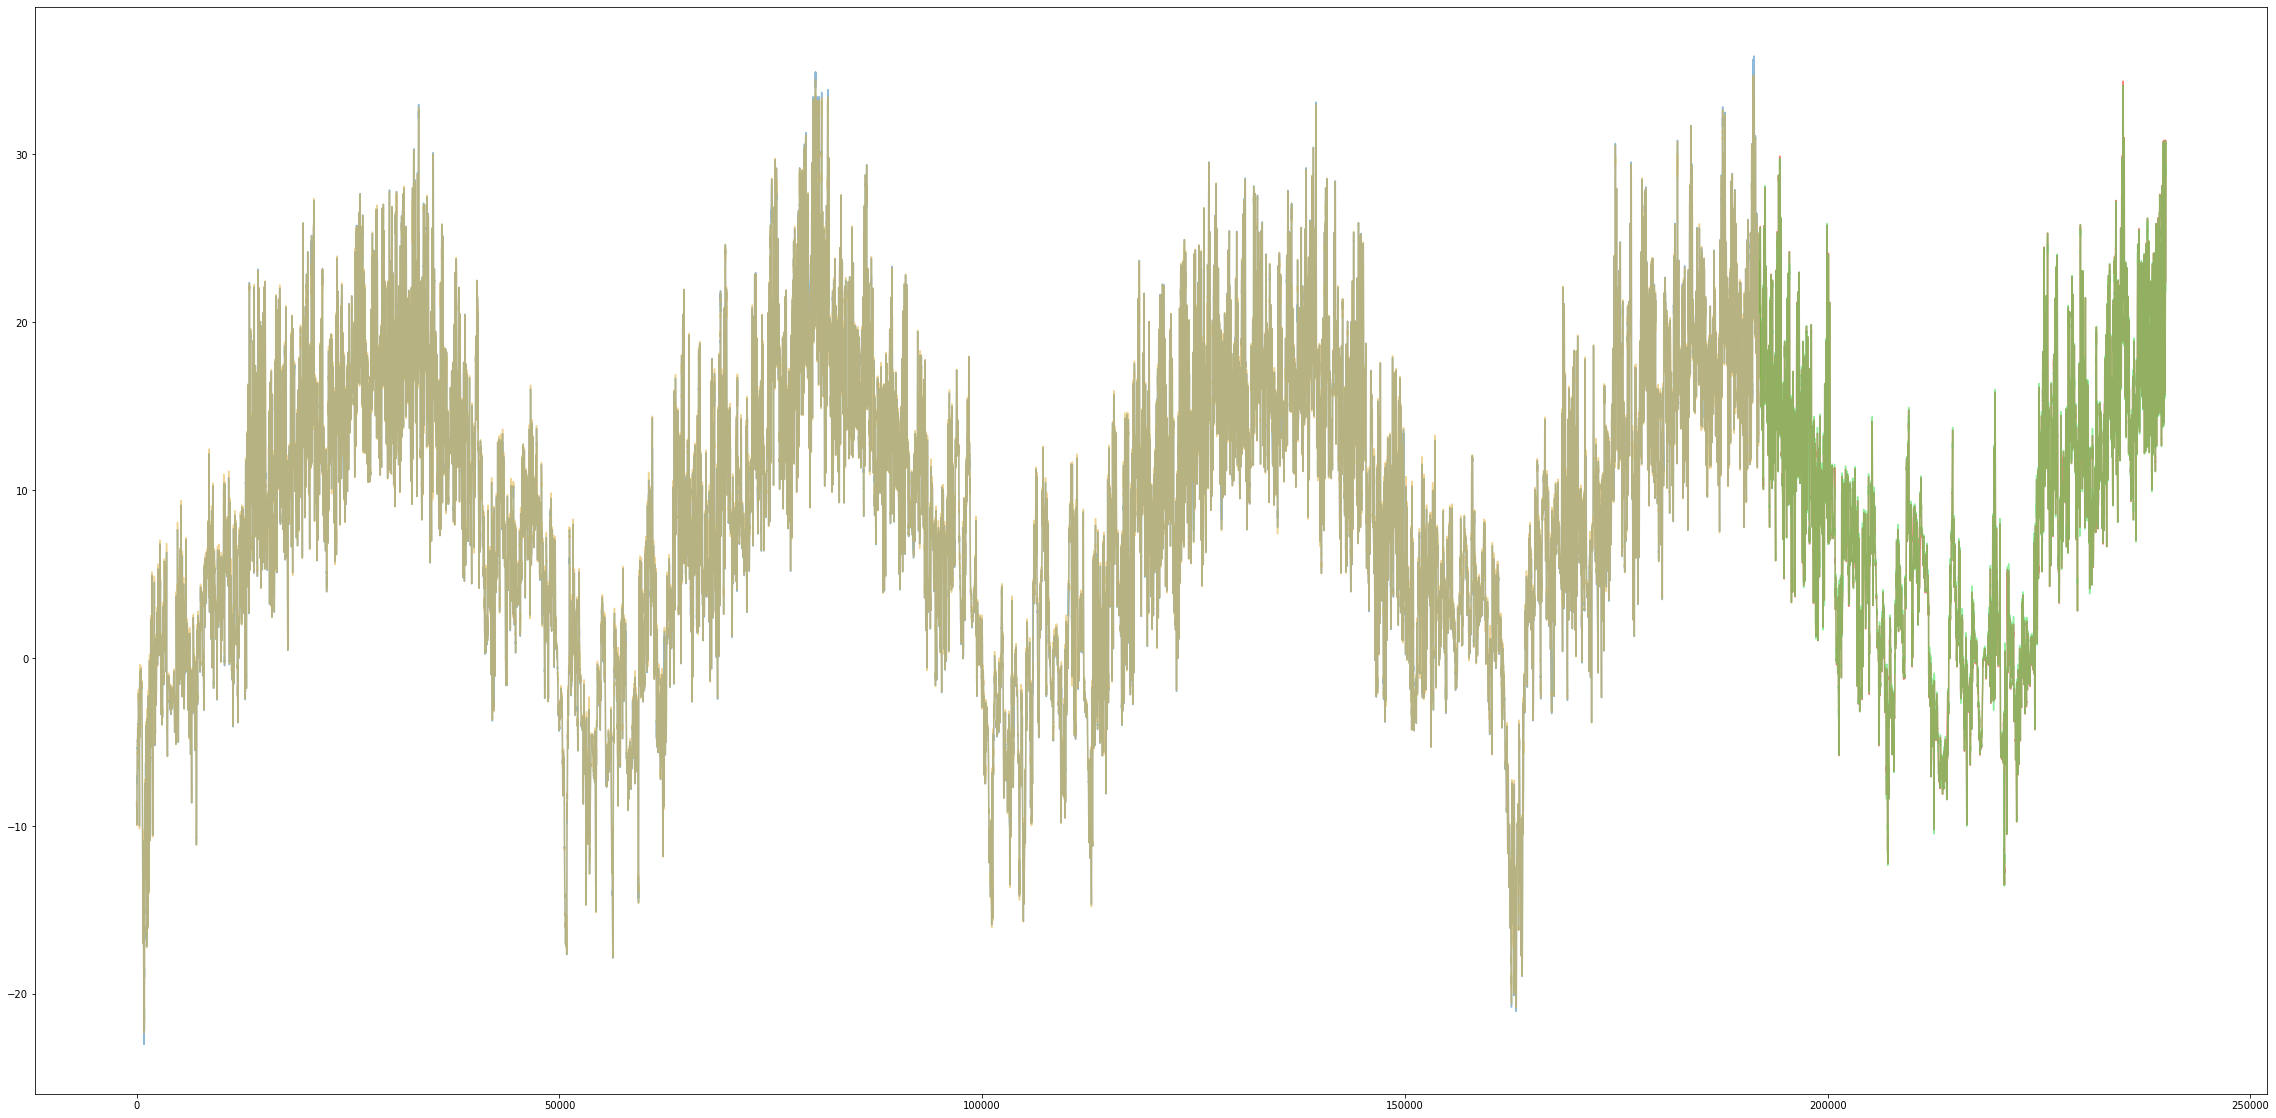

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
x_axis = np.arange(len(x_train))
x2_axis = np.arange(len(x_train), len(x_train)+len(x_test))

# 실제 데이터
plt.plot(x_axis, y_train, alpha=0.5)
plt.plot(x2_axis, y_test, c='red', alpha=0.5)

# 예측 데이터
plt.plot(x_axis, y_train_hat, c='#E0AB2D',alpha=0.5)
plt.plot(x2_axis, y_test_hat, c='#29E045', alpha=0.5)



In [ ]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

import tensorboard
tensorboard.__version__

'2.2.2'

In [ ]:
from datetime import datetime
# https://www.tensorflow.org/tensorboard/graphs

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


model.compile(optimizer='adam',
              loss='mse')
# Train the model.
model.fit(
    x_train,
    y_train,  
    callbacks=[tensorboard_callback],
    epochs=3
    )

Epoch 1/3
6000/6000 [==============================] - 41s 7ms/step - loss: 6.2412e-04
Epoch 2/3
6000/6000 [==============================] - 43s 7ms/step - loss: 6.1354e-04
Epoch 3/3
6000/6000 [==============================] - 42s 7ms/step - loss: 6.1310e-04


In [ ]:
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
gru_20 (GRU)                 (None, 10, 10)            390       
_________________________________________________________________
gru_21 (GRU)                 (None, 10, 10)            660       
_________________________________________________________________
gru_22 (GRU)                 (None, 5)                 255       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 1,311
Trainable params: 1,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
input_  = layers.Input((10,1))

x = layers.GRU(10, return_sequences=True)(input_)
x2 = layers.GRU(10, return_sequences=True)(x)
x = layers.GRU(5)(x2)
y = layers.Dense(1)(x)
model = tf.keras.Model(input_, y)

In [ ]:
%tensorboard --logdir logs

In [ ]:
!pkill tensorboard

In [ ]:
## sklearn's <GridSearch>, RadomizedSearch

## tensorflow: 
# https://github.com/keras-team/keras-tuner

In [ ]:
Data.describe()

p (mbar)       T (degC)  ...  max. wv (m/s)       wd (deg)
count  420551.000000  420551.000000  ...  420551.000000  420551.000000
mean      989.212776       9.450147  ...       3.056555     174.743738
std         8.358481       8.423365  ...      69.016932      86.681693
min       913.600000     -23.010000  ...   -9999.000000       0.000000
25%       984.200000       3.360000  ...       1.760000     124.900000
50%       989.580000       9.420000  ...       2.960000     198.100000
75%       994.720000      15.470000  ...       4.740000     234.100000
max      1015.350000      37.280000  ...      23.500000     360.000000

[8 rows x 14 columns]

In [114]:
Data

p (mbar)  T (degC)  Tpot (K)  ...  wv (m/s)  max. wv (m/s)  wd (deg)
0         996.52     -8.02    265.40  ...      1.03           1.75     152.3
1         996.57     -8.41    265.01  ...      0.72           1.50     136.1
2         996.53     -8.51    264.91  ...      0.19           0.63     171.6
3         996.51     -8.31    265.12  ...      0.34           0.50     198.0
4         996.51     -8.27    265.15  ...      0.32           0.63     214.3
...          ...       ...       ...  ...       ...            ...       ...
420546   1000.07     -4.05    269.10  ...      0.67           1.52     240.0
420547    999.93     -3.35    269.81  ...      1.14           1.92     234.3
420548    999.82     -3.16    270.01  ...      1.08           2.00     215.2
420549    999.81     -4.23    268.94  ...      1.49           2.16     225.8
420550    999.82     -4.82    268.36  ...      1.23           1.96     184.9

[420551 rows x 14 columns]

In [130]:

(x_train, y_train), (x_test, y_test) = time_series_train_test_split(Data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((336432, 10, 14), (336432, 14), (84109, 10, 14), (84109, 14))

In [131]:
y_train, y_test = y_train[:, 1], y_test[:, 1]


In [135]:
input_  = layers.Input((10, 14))

x = layers.GRU(32, return_sequences=True)(input_)
x2 = layers.GRU(32, return_sequences=True)(x)
x = layers.GRU(5)(x2)
y = layers.Dense(1)(x)
model = tf.keras.Model(input_, y)

In [136]:
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
10514/10514 [==============================] - 64s 6ms/step - loss: 32.8105
Epoch 2/10
10514/10514 [==============================] - 67s 6ms/step - loss: 22.5321
Epoch 3/10
10514/10514 [==============================] - 67s 6ms/step - loss: 21.0884
Epoch 4/10
10514/10514 [==============================] - 67s 6ms/step - loss: 20.7595
Epoch 5/10
10514/10514 [==============================] - 67s 6ms/step - loss: 20.9421
Epoch 6/10
10514/10514 [==============================] - 68s 6ms/step - loss: 21.0118
Epoch 7/10
10514/10514 [==============================] - 69s 7ms/step - loss: 21.4767
Epoch 8/10
10514/10514 [==============================] - 69s 7ms/step - loss: 21.5755
Epoch 9/10
10514/10514 [==============================] - 68s 6ms/step - loss: 21.2465
Epoch 10/10
10514/10514 [==============================] - 68s 6ms/step - loss: 21.0020
